In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For model evaluation and algorithms
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

#regression models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#advanced regressors
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#Preparing X and Y variables
X = df.drop(columns=['math score'],axis=1)

In [6]:
# Display unique categories in categorical variables
print("Categories in 'gender' variable:", df['gender'].unique())
print("Categories in 'race/ethnicity' variable:", df['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable:", df['parental level of education'].unique())
print("Categories in 'lunch' variable:", df['lunch'].unique())
print("Categories in 'test preparation course' variable:", df['test preparation course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [7]:
y = df['math score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [9]:
num_features = X.select_dtypes(exclude="object").columns  # Numerical columns
cat_features = X.select_dtypes(include="object").columns  # Categorical columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()  # Standard scaling for numerical data
oh_transformer = OneHotEncoder()        # One-hot encoding for categrical data

#Combineing transformer into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),       
        ("StandardScaler", numeric_transformer, num_features)  
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
#split dataset into training and testing sets
from sklearn.model_selection import train_test_split

#80% training; 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((800, 19), (200, 19))

In [13]:
# Function to evaluate model performance with multiple metrics
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)  
    mse = mean_squared_error(true, predicted)   
    rmse = np.sqrt(mse)                         
    r2_square = r2_score(true, predicted)       
    
    return mae, rmse, r2_square

In [14]:
# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to store model names and their R2 scores
model_list = []
r2_list = []

# Loop through models, train, predict, and evaluate
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions on train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate model on both train and test datasets
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Append model name and test R2 score
    model_list.append(name)
    r2_list.append(model_test_r2)
    
    # Display performance
    print(f"{name}")
    print("Model performance for Training set:")
    print(f"- RMSE: {model_train_rmse:.4f}")
    print(f"- MAE: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")
    
    print('----------------------------------')
    
    print("Model performance for Test set:")
    print(f"- RMSE: {model_test_rmse:.4f}")
    print(f"- MAE: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set:
- RMSE: 5.3257
- MAE: 4.2695
- R2 Score: 0.8742
----------------------------------
Model performance for Test set:
- RMSE: 5.4212
- MAE: 4.2347
- R2 Score: 0.8792


Lasso
Model performance for Training set:
- RMSE: 6.5938
- MAE: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set:
- RMSE: 6.5197
- MAE: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set:
- RMSE: 5.3233
- MAE: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set:
- RMSE: 5.3904
- MAE: 4.2111
- R2 Score: 0.8806




K-Neighbors Regressor
Model performance for Training set:
- RMSE: 5.7079
- MAE: 4.5168
- R2 Score: 0.8555
----------------------------------
Model performance for Test set:
- RMSE: 7.2530
- MAE: 5.6210
- R2 Score: 0.7838


Decision Tree
Model performance for Training set:
- RMSE: 0.2795
- MAE: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set:
- RMSE: 7.5266
- MAE: 5.9700
- R2 Score: 0.7672


Random Forest Regressor
Model performance for Training set:
- RMSE: 2.3140
- MAE: 1.8329
- R2 Score: 0.9762
----------------------------------
Model performance for Test set:
- RMSE: 5.9283
- MAE: 4.5490
- R2 Score: 0.8556


XGBRegressor
Model performance for Training set:
- RMSE: 1.0073
- MAE: 0.6875
- R2 Score: 0.9955
----------------------------------
Model performance for Test set:
- RMSE: 6.4733
- MAE: 5.0577
- R2 Score: 0.8278


CatBoost Regressor
Model performance for Training set:
- RMSE: 3.0427
- MAE: 2.4054
- R2 Score: 0.9589
--------------------

### Model Performance Summary

#### Best Models:
- **Ridge Regression**: 
    - Shows the most consistent performance with very similar results between training and test sets.
    - Prevents overfitting while maintaining a strong fit.
    
- **CatBoost Regressor** and **AdaBoost Regressor**: 
    - Both show good generalization with minimal overfitting.
    - These models are strong candidates based on their stable performance across datasets.

#### Overfitting Issues:
- **Decision Tree** and **XGBRegressor**:
    - Both models exhibit significant overfitting.
    - **Decision Tree** especially performs nearly perfectly on the training set but poorly on the test set, indicating it's memorizing training data instead of generalizing well.

#### Underfitting:
- **Lasso**:
    - Shows slightly worse performance compared to other models, possibly due to excessive regularization.
    - May suggest underfitting, as the model is not capturing enough of the data's complexity.


### Results

In [15]:
# Create a DataFrame to display model names and R2 scores, sorted by R2 score
model_performance_df = pd.DataFrame(list(zip(model_list, r2_list)), 
                                    columns=['Model Name', 'R2_Score']).sort_values(by="R2_Score", ascending=False)

# Display the sorted DataFrame
model_performance_df

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879226
5,Random Forest Regressor,0.855575
7,CatBoost Regressor,0.851632
8,AdaBoost Regressor,0.848603
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.767197


In [16]:
# Train and evaluate a Linear Regression model
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)                   

# Make predictions on the test set
y_pred = lin_model.predict(X_test)

# Calculate the R2 score and convert it to a percentage
score = r2_score(y_test, y_pred) * 100

print("Accuracy of the model is %.2f%%" % score)

Accuracy of the model is 87.92%


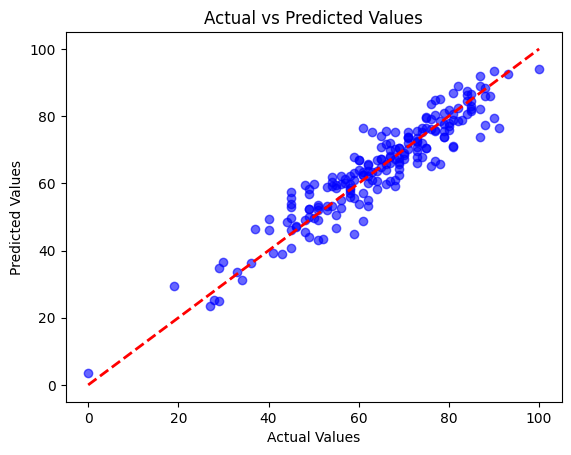

In [17]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

#Plot a diagonal line y = x for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

plt.title('Actual vs Predicted Values')
plt.show()

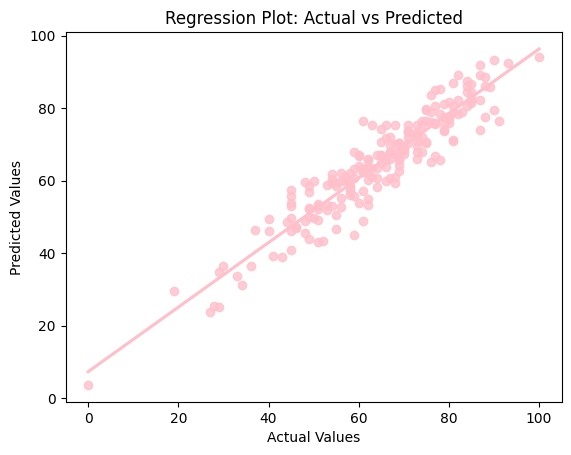

In [18]:
# Plot a regression line between actual and predicted values
sns.regplot(x=y_test, y=y_pred, ci=None, color='pink')  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot: Actual vs Predicted')
plt.show()

In [19]:
# Create a DataFrame to compare actual and predicted values and calculate their difference
pred_df = pd.DataFrame({
    'Actual Value': y_test,               
    'Predicted Value': y_pred,            
    'Difference': y_test - y_pred         
})

pred_df

,Actual Value,Predicted Value,Difference
521,91,76.546875,14.453125
737,53,58.839844,-5.839844
740,80,76.945312,3.054688
660,74,76.570312,-2.570312
411,84,87.535156,-3.535156
...,...,...,...
408,52,43.468750,8.531250
332,62,62.042969,-0.042969
208,74,67.843750,6.156250
613,65,67.167969,-2.167969
